# HW5
## 1. 以下のデータに対してガウス カーネルに対するカーネル密度 推定法を実行せよ バンド幅は尤度交差確認 により決定せよ

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
%matplotlib inline

データの生成

In [8]:
n = 10000

def f(n):
    x = np.zeros(n)
    u = np.random.rand(n)
    for i, v in np.ndenumerate(u):
        if 0<=v and v<1/8:
            x[i] = np.sqrt(8*u[i])
        elif 1/8<=v and v<1/4:
            x[i] = 2-np.sqrt(2-8*u[i])
        elif 1/4<=v and v<1/2 :
            x[i] = 1+4*u[i]
        elif 1/2<=v and v<3/4:
            x[i] = 3+ np.sqrt(4*u[i]-2)
        elif 3/4<=v and v<=1:
            x[i] = 5-np.sqrt(4-4*u[i])
    return x, u
    
        

プロット

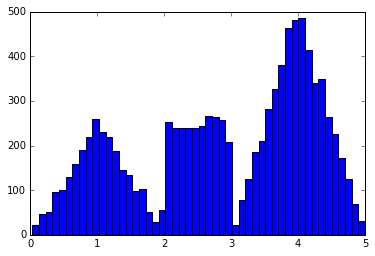

In [9]:
ret = f(n)
y = ret[0]
x = ret[1]
df = pd.DataFrame({"y":y, "x":x})
plt.hist(y, bins=50)
plt.show()

関数の定義

In [10]:
def g_kernel(x):
    return np.exp(-x**2/2)/(2 * np.pi)
n = df.shape[0]
print(n)
Kf = KFold(n, n_folds=3, shuffle=True, random_state=None)

def kfold_likelihood(h):
    L = np.array([])
    for train_index, test_index in Kf:
        f = lambda x: g_kernel((x - y[train_index])/h).sum() / (n * h)
        L = np.append(L, np.log(np.vectorize(f)(y[test_index])).sum() / len(y[test_index]))
    #平均対数尤度を返す
    return L.mean()
H =  np.array([0.01, 0.05, 0.08, 0.1, 0.15, 0.5])
for h in H:
    kfold_likelihood(h)

10000


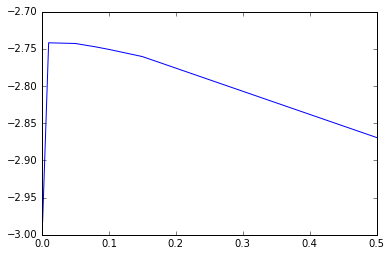

1


In [11]:
H = np.array([0.001, 0.01, 0.05, 0.08, 0.1, 0.15, 0.5])
likelihoods = np.vectorize(kfold_likelihood)(H)
plt.plot(H, likelihoods)
plt.show()
print(np.argmax(likelihoods))

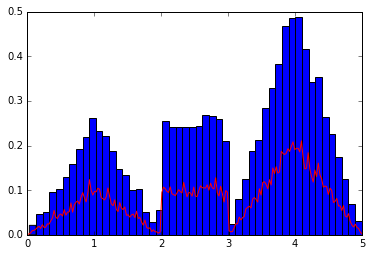

In [12]:
h = H[np.argmax(likelihoods)]
f = lambda x: g_kernel((x - y)/h).sum() / (n * h)
x = np.linspace(0, 5, 200)
plt.hist(y, bins=50, normed = True)
p = np.vectorize(f)(x)
plt.plot(x, p, "r")
plt.show()

上図の様に確率密度がプロットされた。密度の合計が明らかに１ではないので最後の確率密度の計算で間違っていると思われる。

## 2. 最近傍識別器によって手書き文字認識を行え
mat(m)形式のファイルをpythonで取り込むのが大変だったのでmnistで同じことを行いました。
計算時間の都合上CVは行っていません。（一回の計算に３０分以上かかる）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")
X, y = shuffle(mnist.data, mnist.target)
X = X / 255.0
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X, dev_X , train_y, dev_y = train_test_split(train_X, train_y, test_size=0.2)
print(len(train_X))
print(len(dev_X))
print(len(train_y))
print(len(dev_y))

44800
11200
44800
11200


テストデータ


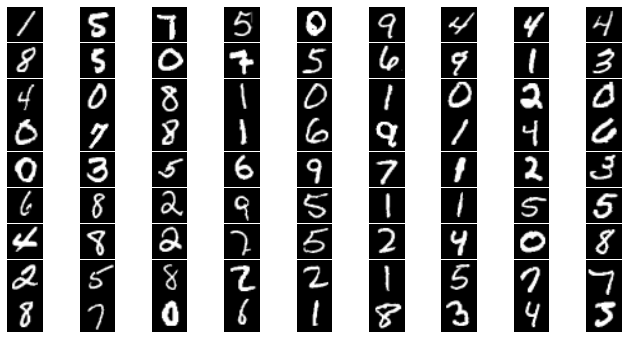

In [3]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
print ("テストデータ")
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i].reshape((28,28)), cmap='gray')

In [5]:
# 必要なもの読み込み
import collections


"""
関数の定義
ここから
"""

def est_type(k, sample, teacher, y):
    train_y = y
    score =[]
    for train_instance_x in teacher:
        score.append(numpy.dot(train_instance_x, sample))
    most_similar = sorted([ (s, l) for s, l in zip(score, train_y)], reverse = True)
#     print most_similar[:k]
    type = []
    for i in most_similar[:k]:
        type.append(i[1])
    #同順位の場合は無視してcountersが最初に選んだものを採用　ランダム？
    est_type = collections.Counter(type).most_common(1)[0][0]
    return est_type

def forall(k, dev, teacher,y):
    ans = []
    i=0
    for sample in dev:

        est = est_type(k, sample, teacher,y)
        ans.append(est)
        i += 1

    print("repeated", i)
    return ans

"""ここまで"""
#正規化
norm = numpy.linalg.norm(train_X, ord=2, axis=1)
train_X = train_X / norm[:,numpy.newaxis]
norm = numpy.linalg.norm(test_X, ord=2, axis=1)
test_X = test_X / norm[:,numpy.newaxis]
#予測
pred_y = forall(80, test_X ,train_X, train_y)


('repeated', 14000)


In [6]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96      1375
        1.0       0.94      0.99      0.97      1591
        2.0       0.98      0.94      0.96      1417
        3.0       0.94      0.95      0.94      1395
        4.0       0.99      0.92      0.95      1313
        5.0       0.99      0.92      0.95      1351
        6.0       0.95      0.98      0.96      1384
        7.0       0.97      0.94      0.95      1434
        8.0       0.95      0.93      0.94      1398
        9.0       0.88      0.95      0.92      1342

avg / total       0.95      0.95      0.95     14000



80-nnでf1 score は0;.95となった